In [1]:
# required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# import module sys to get the type of exception
import sys

In [2]:
train=pd.read_csv('train_IxoE5JN.csv',index_col='datetime')
test=pd.read_csv('test_WudNWDM.csv',index_col='datetime')

In [3]:
train.head()

,row_id,energy
datetime,,
2008-03-01 00:00:00,1,1259.985563
2008-03-01 01:00:00,2,1095.541500
2008-03-01 02:00:00,3,1056.247500
2008-03-01 03:00:00,4,1034.742000
2008-03-01 04:00:00,5,1026.334500


In [4]:
test.head()

,row_id
datetime,
2019-01-01 00:00:00,94993
2019-01-01 01:00:00,94994
2019-01-01 02:00:00,94995
2019-01-01 03:00:00,94996
2019-01-01 04:00:00,94997


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94992 entries, 2008-03-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   row_id  94992 non-null  int64  
 1   energy  93092 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 2.2+ MB


In [6]:
# Converting to date time

In [7]:
train.index=pd.to_datetime(train.index)
test.index=pd.to_datetime(test.index)

In [8]:
# Initally Droping Null Value 
train.energy.isna().sum()/len(train)*100

2.0001684352366516

### Missing Value Imputation

In [9]:
train.dropna(inplace=True)

# other Imputation
train['prev_day_energy']=train.energy.shift(24)
train['prev_shift_energy']=train.energy.shift(12)
train['prev_hour_energy']=train.energy.shift(1)

train.energy=train.energy.fillna(train['prev_day_energy'])
train.energy=train.energy.fillna(train['prev_shift_energy'])
train.energy=train.energy.fillna(train['prev_hour_energy'])

train.drop(['prev_day_energy','prev_shift_energy','prev_hour_energy'],axis=1,inplace=True)

In [10]:
# Checking for Null Value
print('Null value in energy col in pecentage : ',train.energy.isna().sum()/len(train)*100)

Null value in energy col in pecentage :  0.0


In [11]:
def date_time_features(ts_data,datetime='datetime'):
    '''
    Create Features from data frame using the df index 
    '''
    ts_data=ts_data.copy()
    ts_data['year']=ts_data.index.year
    ts_data['month']=ts_data.index.month
    ts_data['day']=ts_data.index.day
    ts_data['hour']=ts_data.index.hour
    ts_data['quater']=ts_data.index.quarter
    ts_data['month_of_quater']=ts_data['month']%ts_data['quater']
    ts_data['day_of_year']=ts_data.index.day_of_year
    ts_data['day_of_quater']=ts_data['day_of_year']%ts_data['quater']
    ts_data['day_of_week']=ts_data.index.day_of_week
    ts_data['week_of_the_year']=ts_data.index.weekofyear
    ts_data['is_weekend']=ts_data['day_of_week'].apply(lambda x : 1 if x==5 or x==6 else 0 )
    ts_data['is_morning']=ts_data['hour'].apply(lambda x : 1 if x>=6 and x<13 else 0)
    ts_data['morning_hour']=ts_data['hour'].apply(lambda x : x-5 if x>=6 and x<13 else 0)
    ts_data['is_afternoon']=ts_data['hour'].apply(lambda x : 1 if x>=13 and x<18 else 0)
    ts_data['afternoon_hour']=ts_data['hour'].apply(lambda x : x-12 if x>=13 and x<18 else 0)
    ts_data['is_evening']=ts_data['hour'].apply(lambda x : 1 if x>=18 and x<22 else 0)
    ts_data['evening_hour']=ts_data['hour'].apply(lambda x : x-17 if x>=18 and x<22 else 0)
    ts_data['is_night']=ts_data['hour'].apply(lambda x : 1 if x>=22 or x<6 else 0)
    ts_data['night_hour']=ts_data['hour'].apply(lambda x: x-21 if x>21 else x+3)
    ts_data['is_am']=ts_data['hour'].apply(lambda x : 1 if x>=0 and x<13 else 0)
    ts_data['is_pm']=ts_data['hour'].apply(lambda x : 1 if x>=13 and x<24 else 0)
    
    return ts_data

In [12]:
train=date_time_features(train)
test=date_time_features(test)

In [13]:
train.corr()

,row_id,energy,year,month,day,hour,quater,month_of_quater,day_of_year,day_of_quater,...,is_morning,morning_hour,is_afternoon,afternoon_hour,is_evening,evening_hour,is_night,night_hour,is_am,is_pm
row_id,1.000000,0.612620,0.995815,0.054808,0.006830,0.000168,0.054915,0.029444,0.054670,0.032960,...,0.000348,0.000622,-0.000408,-0.000336,-0.000535,-0.000420,0.000439,-0.000619,0.000277,-0.000277
energy,0.612620,1.000000,0.607429,0.062073,0.004261,0.320192,0.069054,0.018845,0.061294,0.041842,...,0.007548,0.073404,0.147761,0.130177,0.170252,0.153329,-0.269092,0.269844,-0.276915,0.276915
year,0.995815,0.607429,1.000000,-0.036355,-0.001771,-0.000123,-0.033602,-0.018695,-0.036819,-0.019726,...,0.000431,0.000674,-0.000452,-0.000392,-0.000716,-0.000588,0.000540,-0.000770,0.000529,-0.000529
month,0.054808,0.062073,-0.036355,1.000000,0.009999,0.000408,0.970778,0.527765,0.996435,0.578759,...,-0.000255,-0.000228,-0.000239,-0.000149,0.000541,0.000508,0.000024,0.000165,-0.000351,0.000351
day,0.006830,0.004261,-0.001771,0.009999,1.000000,0.000171,0.011497,0.008536,0.094029,-0.004239,...,-0.000148,-0.000204,-0.000041,0.000026,0.000019,-0.000374,0.000163,-0.000237,-0.000217,0.000217
hour,0.000168,0.320192,-0.000123,0.000408,0.000171,1.000000,0.000384,0.000005,0.000419,0.000029,...,-0.231462,-0.119466,0.259316,0.272820,0.516606,0.492946,-0.408580,0.540424,-0.863800,0.863800
quater,0.054915,0.069054,-0.033602,0.970778,0.011497,0.000384,1.000000,0.619552,0.967531,0.597383,...,-0.000343,-0.000224,-0.000251,-0.000171,0.000596,0.000505,0.000076,0.000198,-0.000349,0.000349
month_of_quater,0.029444,0.018845,-0.018695,0.527765,0.008536,0.000005,0.619552,1.000000,0.526177,0.374378,...,-0.000723,-0.000478,-0.000250,-0.000174,0.000576,0.000173,0.000457,0.000128,-0.000155,0.000155
day_of_year,0.054670,0.061294,-0.036819,0.996435,0.094029,0.000419,0.967531,0.526177,1.000000,0.575877,...,-0.000264,-0.000243,-0.000239,-0.000144,0.000539,0.000473,0.000035,0.000146,-0.000366,0.000366
day_of_quater,0.032960,0.041842,-0.019726,0.578759,-0.004239,0.000029,0.597383,0.374378,0.575877,1.000000,...,0.000482,0.000784,-0.000982,-0.000758,0.000369,0.000514,0.000090,-0.000031,0.000490,-0.000490


<AxesSubplot:>

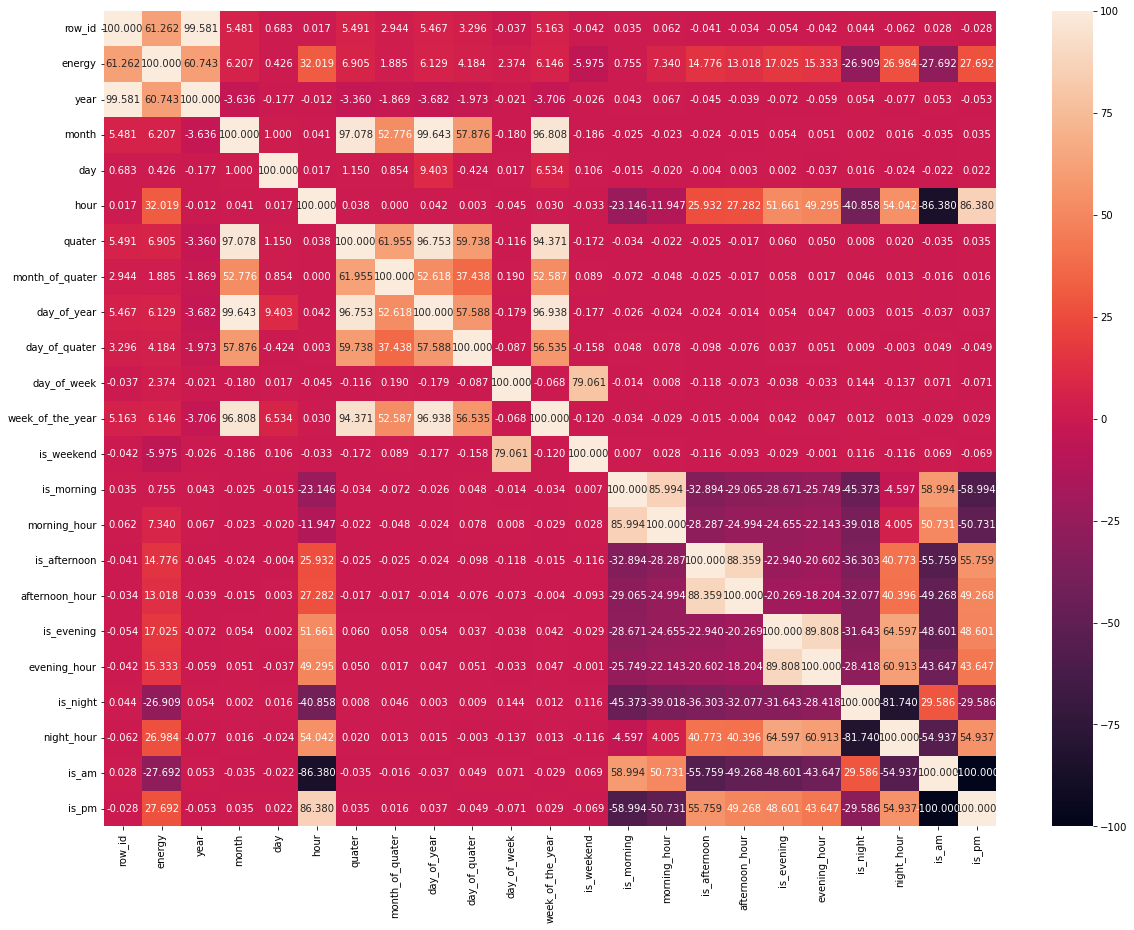

In [14]:
plt.figure(figsize=(20,15))
sns.heatmap(train.corr()*100,annot=True,fmt='0.3f')

In [15]:
train_set=train[(train.index<='28-02-2018')]
valid_set=train[(train.index>'28-02-2018')]

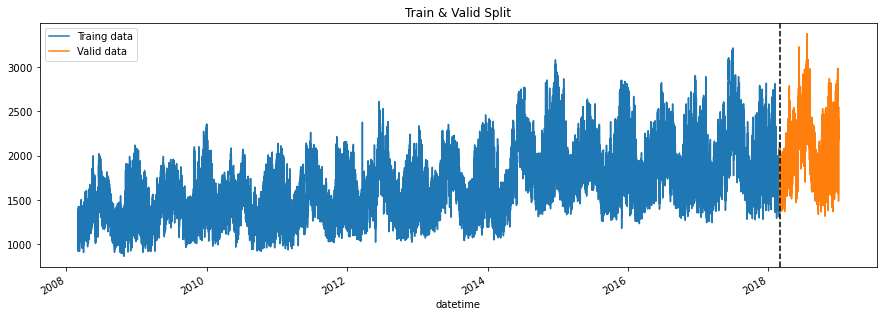

In [16]:
fig,ax=plt.subplots(figsize=(15,5))
train_set['energy'].plot(ax=ax,label='Traing data',title='Train & Valid Split')
valid_set['energy'].plot(ax=ax,label='Valid data')
ax.axvline('28-02-2018',color='black',ls='--')
ax.legend()
plt.show()

In [17]:
import xgboost as xgb

In [18]:
from sklearn.metrics import r2_score, mean_squared_error

In [19]:
xtrain=train_set.drop(['energy'],axis=1)
ytrain=train_set.energy

xtest=valid_set.drop(['energy'],axis=1)
ytest=valid_set.energy

In [20]:
reg_model=xgb.XGBRegressor(n_estimators=1000,learning_rate=1.0,max_depth=4,alpha=100,
                        early_stopping_rounds=50)
reg_model.fit(xtrain,ytrain,
             eval_set=[(xtrain,ytrain),(xtest,ytest)],verbose=5)

[0]	validation_0-rmse:222.36170	validation_1-rmse:308.15681
[5]	validation_0-rmse:150.09754	validation_1-rmse:211.66850
[10]	validation_0-rmse:135.37177	validation_1-rmse:209.78429
[15]	validation_0-rmse:126.63993	validation_1-rmse:215.66893
[20]	validation_0-rmse:122.96834	validation_1-rmse:232.30140
[25]	validation_0-rmse:117.79998	validation_1-rmse:232.67769
[30]	validation_0-rmse:112.54209	validation_1-rmse:232.62859
[35]	validation_0-rmse:108.50363	validation_1-rmse:234.36036
[40]	validation_0-rmse:104.12520	validation_1-rmse:236.73831
[45]	validation_0-rmse:100.29533	validation_1-rmse:280.91072
[50]	validation_0-rmse:97.14899	validation_1-rmse:281.20695
[55]	validation_0-rmse:94.69148	validation_1-rmse:310.22964
[60]	validation_0-rmse:92.06682	validation_1-rmse:309.22741
[61]	validation_0-rmse:91.77499	validation_1-rmse:308.60615


XGBRegressor(alpha=100, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=1.0, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=100, ...)

In [21]:
#model_feat_imp=pd.DataFrame([reg_model.feature_names_in_,reg_model.feature_importances_])

In [22]:
#model_feat_imp.T

In [23]:
ypred=reg_model.predict(xtest)

In [24]:
r2_score(ytest,ypred)

0.6578417579368832

0 - 0.5670194316316716 (xgbooster base model)
<br>
1 - 0.5173743541385102 (missing value imputation)
<br>
2 - 0.599232102163346 (just droped missing value, created features from hour column)
<br>
3 - 0.6051232651209062 (just droped missing value, created more additional features from hour column (am,pm) )
<br>
4 - 0.6053248119191166 (just droped missing value, created more additional features from hour column (mor_hr,eve_hr..) )
<br>
5 - 0.6260152099178304 (just droped missing value, created more additional features like (day of quater,month of quater) )
<br>
6 - 0.6534550438936448 (Tunning the model with learning rate - 0.1) 

In [25]:
mean_squared_error(ytest,ypred)

42509.29241697299

0 - 53792.9394325132
<br>1 - 59898.62084758878
<br>2 - 49790.879383028965
<br>3 - 49058.96900340768
<br>4 - 48908.94900340768
<br>5 - 46463.38111057568
<br>6 - 43054.29203144745

In [26]:
predicted_data=pd.DataFrame(ypred,index=ytest.index) 

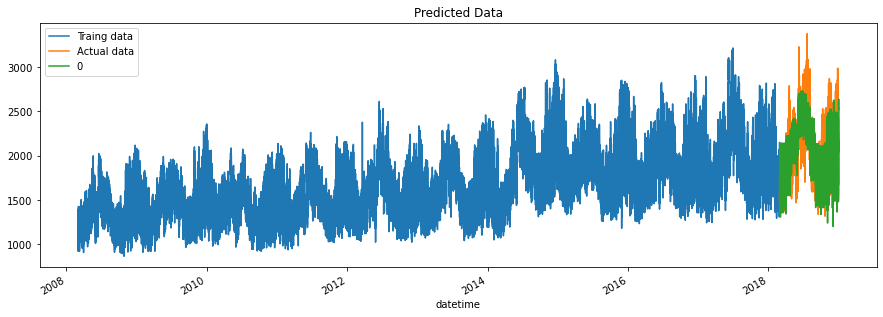

In [27]:
fig,ax=plt.subplots(figsize=(15,5))
ytrain.plot(ax=ax,label='Traing data',title='Predicted Data')
ytest.plot(ax=ax,label='Actual data')
predicted_data.plot(ax=ax,label='predicted data')
#ax.axvline('09-01-2020',color='black',ls='--')
ax.legend()
plt.show()

In [28]:
#Actual data
xtrain=train.drop(['energy'],axis=1)
ytrain=train.energy

xtest=test
#ytest=valid_set.energy

In [29]:
Actual_pred=reg_model.predict(xtest)

In [30]:
Actual_pred

array([1884.0713, 1880.8633, 1572.7662, ..., 2206.1345, 2076.9143,
       2016.1648], dtype=float32)

In [31]:
xtest['energy']=Actual_pred

In [32]:
base_model=xtest[['row_id','energy']]

In [33]:
#base_model.to_csv('base_model_5.csv',index=False)

In [34]:
# Just Alpha Value tuning